In [1]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re
import numpy as np

In [2]:
path = 'cleaned/review.json'

In [3]:
# This is a hack
json_data = list(pd.read_json(path).data)
df = pd.DataFrame(json_data)

In [24]:
df.head(10)

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
0,iCQpiavjjPzJ5_3gPD5Ebg,0,2011-02-25,0,x7mDIiDB3jEiPGPHOmDzyw,2,The pizza was okay. Not the best I've had. I p...,0,msQe1u7Z_XuqjGoqhB0J5g
1,pomGBqfbxcqPv14c3XH-ZQ,0,2012-11-13,0,dDl8zu1vWPdKGihJrwQbpw,5,I love this place! My fiance And I go here atl...,0,msQe1u7Z_XuqjGoqhB0J5g
2,jtQARsP6P-LbkyjbO1qNGg,1,2014-10-23,1,LZp4UX5zK3e-c5ZGSeo3kA,1,Terrible. Dry corn bread. Rib tips were all fa...,3,msQe1u7Z_XuqjGoqhB0J5g
3,elqbBhBfElMNSrjFqW3now,0,2011-02-25,0,Er4NBWCmCD4nM8_p1GRdow,2,Back in 2005-2007 this place was my FAVORITE t...,2,msQe1u7Z_XuqjGoqhB0J5g
4,Ums3gaP2qM3W1XcA5r6SsQ,0,2014-09-05,0,jsDu6QEJHbwP2Blom1PLCA,5,Delicious healthy food. The steak is amazing. ...,0,msQe1u7Z_XuqjGoqhB0J5g
5,vgfcTvK81oD4r50NMjU2Ag,0,2011-02-25,0,pfavA0hr3nyqO61oupj-lA,1,This place sucks. The customer service is horr...,2,msQe1u7Z_XuqjGoqhB0J5g
6,AxeQEz3-s9_1TyIo-G7UQw,0,2011-10-10,0,brokEno2n7s4vrwmmUdr9w,5,"If you like Thai food, you have to try the ori...",1,msQe1u7Z_XuqjGoqhB0J5g
7,zdE82PiD6wquvjYLyhOJNA,0,2012-04-18,1,kUZWBVZvhWuC8TWUg5AYyA,5,AMAZING!!!\n\n I was referred here by a friend...,0,msQe1u7Z_XuqjGoqhB0J5g
8,EAwh1OmG6t6p3nRaZOW_AA,0,2011-02-25,0,wcqt0III88LEcm19IxFFyA,4,Ribs = amazing\n2 hour wait time= not so amazi...,0,msQe1u7Z_XuqjGoqhB0J5g
9,atVh8viqTj-sqDJ35tAYVg,1,2012-11-09,2,LWUtqzNthMM3vpWZIFBlPw,2,"Food is pretty good, not gonna lie. BUT you ha...",1,msQe1u7Z_XuqjGoqhB0J5g


In [7]:
df2017 = df[(df.date > '2016-12-31') & (df.date < '2018-01-01')]

In [13]:
df = df2017

In [14]:
pos_list = list(df[df.stars == 5].text)
neg_list = list(df[df.stars == 1 ].text)

In [15]:
import nltk
stop = nltk.corpus.stopwords.words('english')

In [16]:
pos_doc = " ".join(pos_list)
pos_doc = pos_doc.lower()
pos_tokens = re.findall(r'[a-zA-Z]+', pos_doc)
pos_tokens = [t for t in pos_tokens if t not in stop]
pos = " ".join(pos_tokens)

In [17]:
neg_doc = " ".join(neg_list)
neg_doc = neg_doc.lower()
neg_tokens = re.findall(r'[a-zA-Z]+', neg_doc)
neg_tokens = [t for t in neg_tokens if t not in stop]
neg = " ".join(neg_tokens)

In [18]:
def tf_idf(doc1, doc2, N=2):
    # TF
    fd = nltk.FreqDist(doc1)
    sorted_tokens = [x[0] for x in fd.most_common()]
    tf = np.array([x[1] for x in fd.most_common()])

    # IDF
    set1, set2 = set(doc1), set(doc2)
    df = np.array([(t in set1) + (t in set2) for t in sorted_tokens])
    idf = np.log(N / df)
    
    # TFIDF
    return tf * idf, sorted_tokens

In [19]:
def make_wordcloud(tokens, tfidf, title):
    # Round scores
    tfidf_rounded = np.array(tfidf, dtype="int32")
    document = " ".join([(w + " ") * n for w,n in zip(tokens, tfidf_rounded)])
    
    # Plot
    wc = WordCloud(
        background_color="white", 
        max_words=4000, contour_width=3, 
        contour_color='steelblue', 
        collocations=False
    ).generate(document)

    plt.figure(figsize=[10,5])
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.title(title)
    plt.savefig('plots/%s.png' % title, format='png', bbox_inches="tight")
    plt.show()

In [20]:
pos_scores, pos_sorted_tokens = tf_idf(pos_tokens, neg_tokens)

In [21]:
neg_scores, neg_sorted_tokens = tf_idf(neg_tokens, pos_tokens)

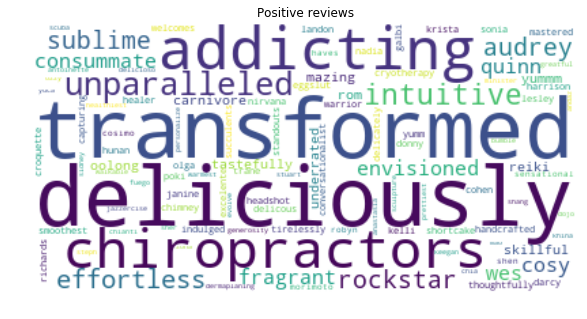

In [22]:
make_wordcloud(pos_sorted_tokens, pos_scores, 'Positive reviews')

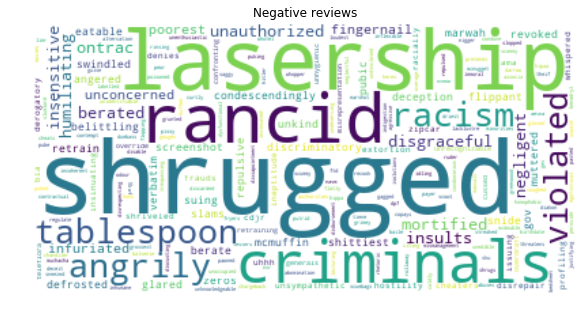

In [23]:
make_wordcloud(neg_sorted_tokens, neg_scores, 'Negative reviews')

In [24]:
import networkx as nx

In [25]:
# This is a hack
json_data = list(pd.read_json('cleaned/business.json').data)
df = pd.DataFrame(json_data)

In [57]:
keywords = ['restaurant', 'food']

In [58]:
idx = df.categories.str.lower().str.contains("|".join(keywords)).fillna(False)

In [61]:
rest = df[idx]

In [64]:
len(df)

188593

In [72]:
rest = rest.drop(['attributes', 'categories', 'address', 'neighborhood'], axis=1)

In [73]:
rest.to_csv('cleaned_csv/restaurants.csv')